In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

import torch
from torch.autograd import grad

import sys
sys.path.append("../modules/")
from simpleDDP import solve

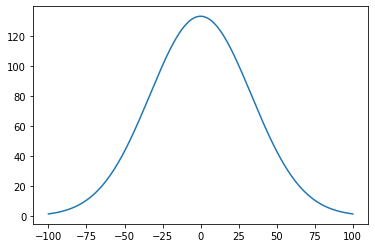

In [530]:
def additional_move(a):
    return 5*torch.sin(a)

def f(x, a):
    return x+additional_move(a)

def r(x, mu=0, sigma=0.03):
    return 1/(np.sqrt(2*np.pi*sigma**2))*torch.exp(-(x-mu)**2/2*sigma**2)*10
#     return x**2

x = torch.tensor(np.arange(-100,100,0.01))
y = r(x)
plt.plot(x,y)

In [535]:
logs = solve(
                f, r, n_roop=100, time_length=5, mode_ascent=True, 
                eta=5e-3, init_x=40, init_a_range=0., clip_a_value=None, 
                stack_log=False)

In [536]:
logs[-1]

,nx,ex,na,er,fx,fa,rx,sigma,ja
0,40.000000,35.000000,-1.570796,0.000000,1.0,9.735359e-07,0.000000,-10.688931,-0.000010
1,35.000000,30.000000,-1.570796,76.627380,1.0,9.735359e-07,-2.413762,-8.275169,-0.000008
2,30.000000,25.000000,-1.570796,88.695076,1.0,1.569582e-06,-2.394767,-5.880402,-0.000009
3,25.000000,20.000000,-1.570684,100.379143,1.0,6.190737e-04,-2.258531,-3.621871,-0.002242
4,20.000000,15.001772,-1.545250,111.074867,1.0,1.331170e-01,-1.999347,-1.622524,-0.215986
5,15.001772,NaN,NaN,120.172775,NaN,NaN,-1.622524,0.000000,NaN


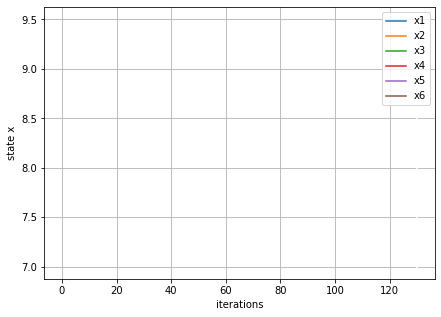

In [107]:
logs_x = [np.array([logs[i].nx[j] for i in range(len(logs))]) for j in range(len(logs[0]-1))]

fig = plt.figure(figsize=(7,5))
plt.axvline(130,c="white")
for i in range(1,len(logs[0])):
    plt.plot(logs_x[i], label=f"x{i}")
plt.grid()
plt.legend(loc="upper right")
plt.xlabel("iterations")
plt.ylabel("state x")
plt.show()

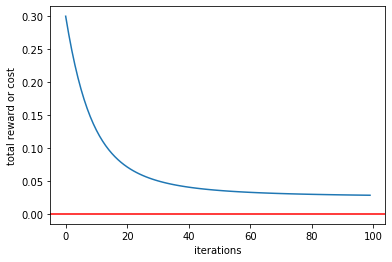

In [7]:
sums = np.array([logs[i].er.sum() for i in range(len(logs))])
plt.xlabel("iterations")
# plt.ylabel("total reward or cost (log scale)")
# plt.plot(np.log(sums))
plt.ylabel("total reward or cost")
plt.plot(sums)
plt.axhline(0,c="r")